In [3]:
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2

In [ ]:
model = load_model('tomnod_1_50epochs.h5')

In [2]:
original_dataset_dir = '/home/ubuntu'

In [1]:
train_damage_dir =  'train_another/damage'
validation_damage_dir =  'validation_another/damage'
test_damage_dir = 'test_another/damage'

train_nodamage_dir =  'train_another/no_damage'
validation_nodamage_dir ='validation_another/no_damage'
test_nodamage_dir = 'test_another/no_damage'

In [3]:
print('total training damage images: ',len((train_damage_dir)))
print('total validation damage images: ',len((validation_damage_dir)))
print('total test damage images: ',len((test_damage_dir)))



total training damage images:  20
total validation damage images:  25
total test damage images:  19


In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=50)

C:\Users\admin\AppData\Local\Temp\ipykernel_24704\3885924556.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
100/100 [==============================] - 55s 542ms/step - loss: 0.6418 - acc: 0.6085 - val_loss: 0.5520 - val_acc: 0.7230
Epoch 2/50
100/100 [==============================] - 38s 380ms/step - loss: 0.5463 - acc: 0.7445 - val_loss: 0.4841 - val_acc: 0.7990
Epoch 3/50
100/100 [==============================] - 36s 362ms/step - loss: 0.5076 - acc: 0.7725 - val_loss: 0.4867 - val_acc: 0.7740
Epoch 4/50
100/100 [==============================] - 52s 526ms/step - loss: 0.4465 - acc: 0.8025 - val_loss: 0.4109 - val_acc: 0.8310
Epoch 5/50
100/100 [==============================] - 37s 372ms/step - loss: 0.4328 - acc: 0.8210 - val_loss: 0.3709 - val_acc: 0.8510
Epoch 6/50
100/100 [==============================] - 35s 351ms/step - loss: 0.3827 - acc: 0.8390 - val_loss: 0.4178 - val_acc: 0.8230
Epoch 7/50
100/100 [==============================] - 33s 334ms/step - loss: 0.3661 - acc: 0.8490 - val_loss: 0.3705 - val_acc: 0.8570
Epoch 8/50
100/100 [==============================] - 3

In [10]:
#it is generally a good practice to save the model after training
model.save('tomnod_1.h5')

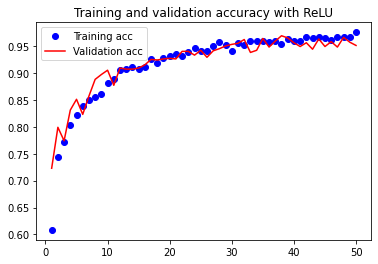

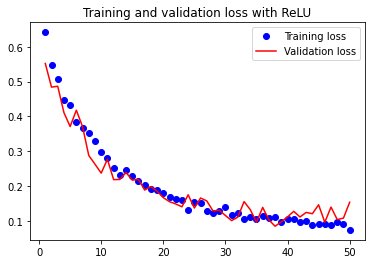

In [11]:
#plot loss and accuracy for detection overfitting (30 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [12]:
#it is generally a good practice to save the model after training
model.save('tomnod_1_50epochs.h5')

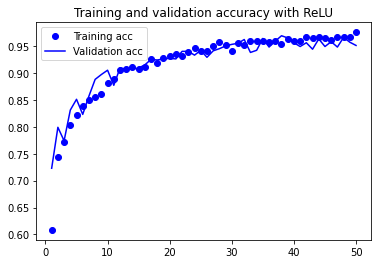

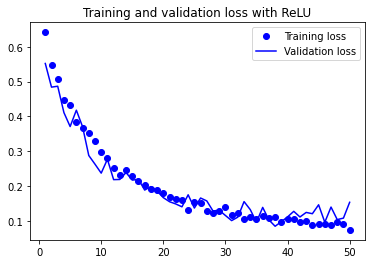

In [13]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [14]:
#the accuracy stalls at about 95.5% and we start seeing overfitting
#we perform data augmentation
#to fight overfitting, we add a Dropout layer right before 
#the densely connected layer
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.RMSprop(lr = 1e-4),
                 metrics = ['acc'])

In [16]:
#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\admin\AppData\Local\Temp\ipykernel_24704\2565266996.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 65s 634ms/step - loss: 0.6504 - acc: 0.6219 - val_loss: 0.5471 - val_acc: 0.7912
Epoch 2/100
100/100 [==============================] - 90s 900ms/step - loss: 0.5596 - acc: 0.7331 - val_loss: 0.5045 - val_acc: 0.8094
Epoch 3/100
100/100 [==============================] - 50s 499ms/step - loss: 0.5247 - acc: 0.7669 - val_loss: 0.4522 - val_acc: 0.8225
Epoch 4/100
100/100 [==============================] - 50s 499ms/step - loss: 0.4761 - acc: 0.7984 - val_loss: 0.4208 - val_acc: 0.8394
Epoch 5/100
100/100 [==============================] - 52s 519ms/step - loss: 0.4541 - acc: 0.8062 - val_loss: 0.3953 - val_acc: 0.8369
Epoch 6/100
100/100 [==============================] - 50s 496ms/step - loss: 0.4210 - acc: 0.8250 - val_loss: 0.3591 - val_acc: 0.8531
Epoch 7/100
100/100 [==============================] - 50s 492ms/step - loss: 0.4187 - acc: 0.8216 - val_loss: 0.3654 - val_acc: 0.8444
Epoch 8/100
100/100 [===========================

In [17]:
#it is generally a good practice to save the model after training
model.save('tomnod_2_100epochs.h5')

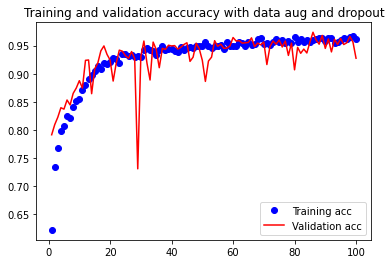

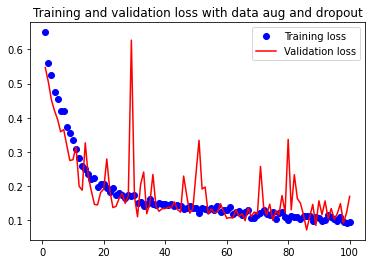

In [18]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout')
plt.legend()

plt.show()

In [ ]:
#validation accuracy can go up to 97.44%

In [22]:
#try again with Adam optimizer
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.Adam(),
                 metrics = ['acc'])

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100


C:\Users\admin\AppData\Local\Temp\ipykernel_24704\1488430298.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 44s 431ms/step - loss: 0.6200 - acc: 0.6385 - val_loss: 0.4093 - val_acc: 0.8356
Epoch 2/100
100/100 [==============================] - 50s 498ms/step - loss: 0.4057 - acc: 0.8313 - val_loss: 0.4362 - val_acc: 0.7831
Epoch 3/100
100/100 [==============================] - 53s 531ms/step - loss: 0.2990 - acc: 0.8756 - val_loss: 0.5146 - val_acc: 0.7931
Epoch 4/100
100/100 [==============================] - 52s 523ms/step - loss: 0.2480 - acc: 0.9031 - val_loss: 0.2686 - val_acc: 0.8825
Epoch 5/100
100/100 [==============================] - 52s 519ms/step - loss: 0.2710 - acc: 0.8888 - val_loss: 0.2998 - val_acc: 0.8737
Epoch 6/100
100/100 [==============================] - 57s 565ms/step - loss: 0.2348 - acc: 0.9086 - val_loss: 0.2002 - val_acc: 0.9212
Epoch 7/100
100/100 [==============================] - 54s 543ms/step - loss: 0.2011 - acc: 0.9212 - val_loss: 0.1769 - val_acc: 0.9325
Epoch 8/100
100/100 [==============================] - 54s 5

In [23]:
model.save('tomnod_2_100epochs_Adam.h5')

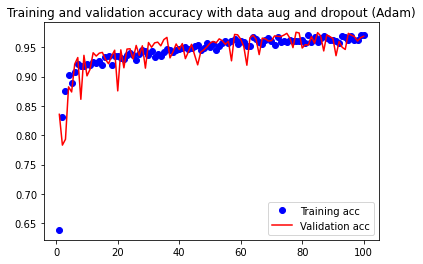

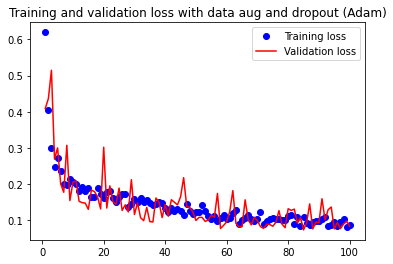

In [24]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()

In [25]:
#to visualize the intermediate activation
from keras.models import load_model

In [26]:
model1 = load_model('tomnod_1.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [29]:
img_path = 'damage/-96.960704_28.783292.jpeg'
import keras.utils as image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


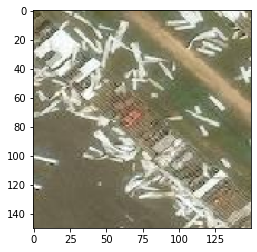

In [30]:
plt.imshow(img_tensor[0])
plt.show()

In [31]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

1/1 [==============================] - 0s 137ms/step


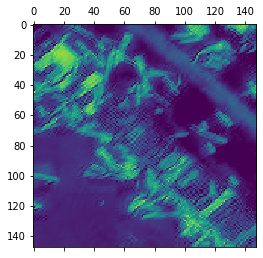

In [32]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4],cmap = 'viridis')

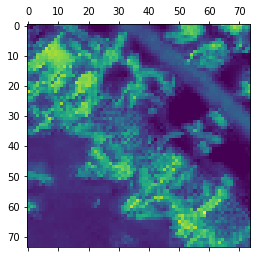

In [33]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0,:,:,4],cmap = 'viridis')

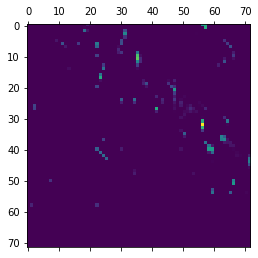

In [34]:
third_layer_activation = activations[2]
plt.matshow(third_layer_activation[0,:,:,4],cmap = 'viridis')

C:\Users\admin\AppData\Local\Temp\ipykernel_24704\1119252562.py:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


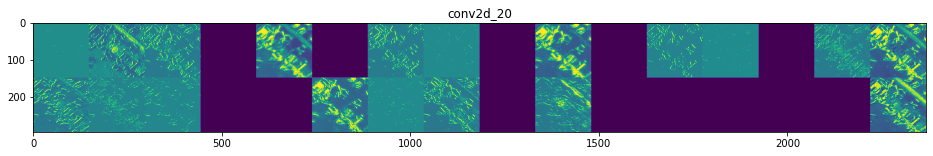

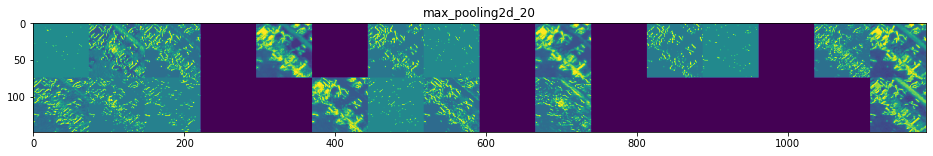

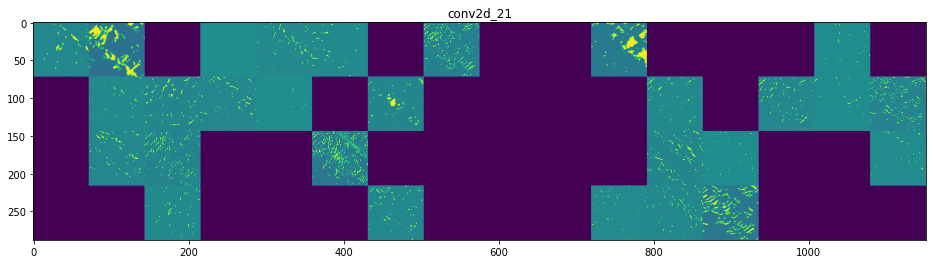

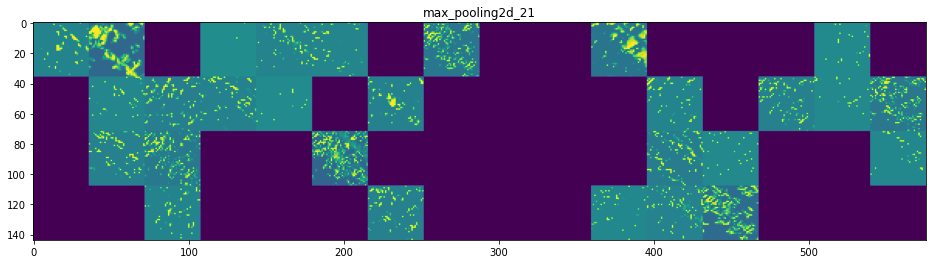

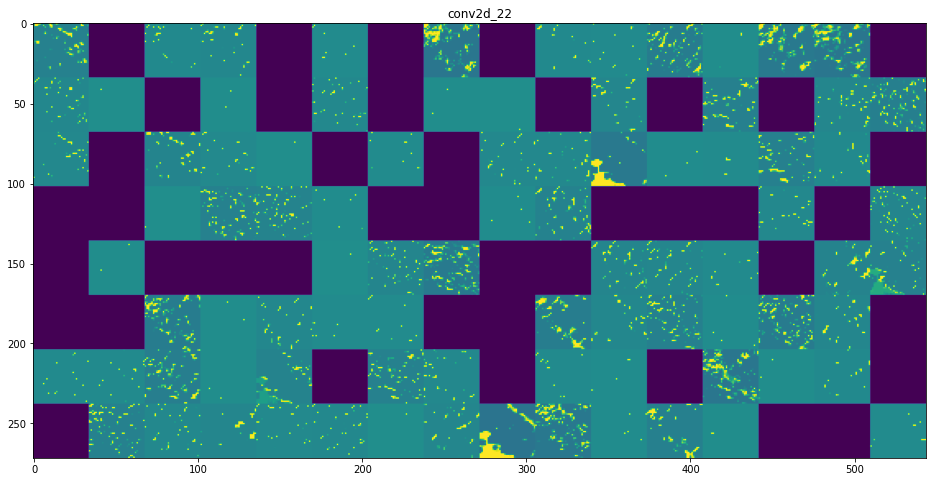

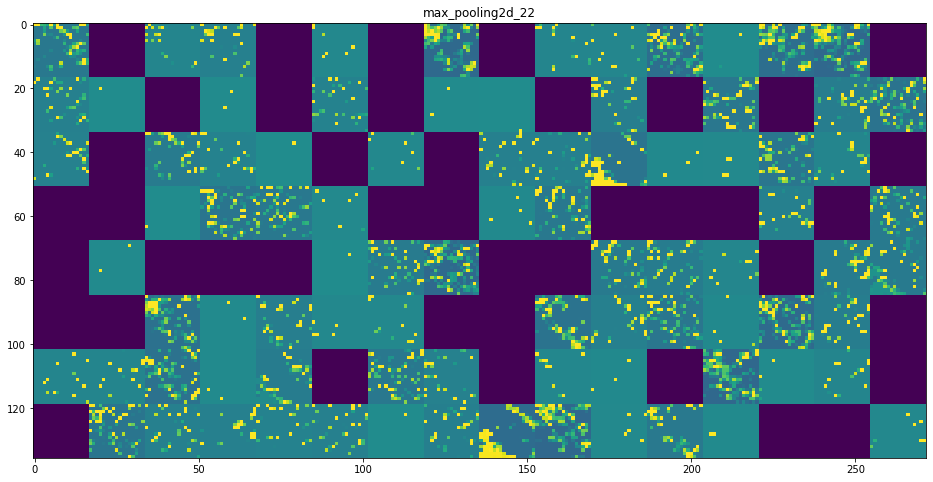

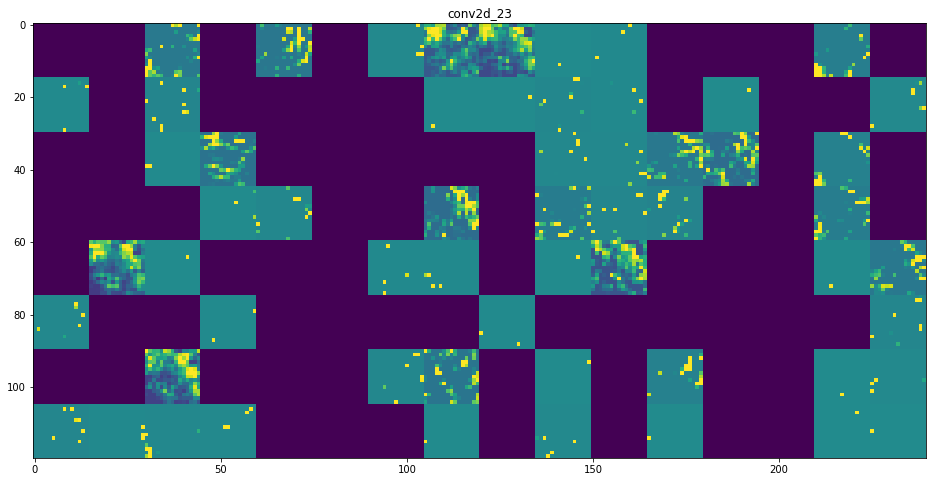

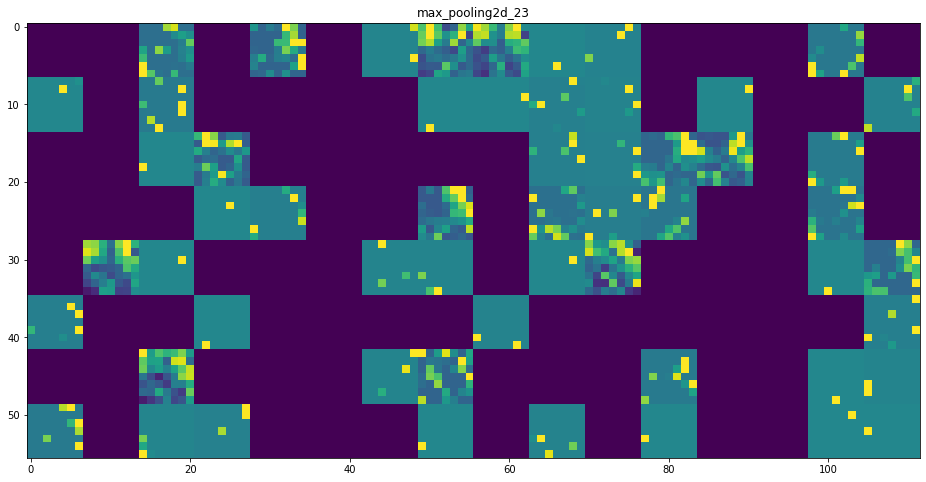

In [35]:
layer_names =[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [36]:
plt.savefig('informationFlow-relu.png')

<Figure size 432x288 with 0 Axes>

In [38]:
#let's build a model with leaky ReLU
from keras.layers import LeakyReLU
from keras.regularizers import l2
model_l = models.Sequential()
model_l.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(64,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Flatten())
model_l.add(layers.Dense(512,kernel_regularizer = l2(1e-6)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.Dense(1, activation = 'sigmoid'))

In [39]:
model_l.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

In [40]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model_l.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

#fit the model from image generator
history = model_l.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)



C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30


C:\Users\admin\AppData\Local\Temp\ipykernel_24704\1845418785.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_l.fit_generator(


100/100 [==============================] - 34s 336ms/step - loss: 0.6372 - acc: 0.6325 - val_loss: 0.5261 - val_acc: 0.7930
Epoch 2/30
100/100 [==============================] - 35s 355ms/step - loss: 0.5295 - acc: 0.7545 - val_loss: 0.4482 - val_acc: 0.8410
Epoch 3/30
100/100 [==============================] - 35s 350ms/step - loss: 0.4882 - acc: 0.7770 - val_loss: 0.4005 - val_acc: 0.8330
Epoch 4/30
100/100 [==============================] - 35s 350ms/step - loss: 0.4115 - acc: 0.8235 - val_loss: 0.3660 - val_acc: 0.8610
Epoch 5/30
100/100 [==============================] - 35s 350ms/step - loss: 0.4125 - acc: 0.8280 - val_loss: 0.4381 - val_acc: 0.8110
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.3857 - acc: 0.8390 - val_loss: 0.3602 - val_acc: 0.8470
Epoch 7/30
100/100 [==============================] - 35s 350ms/step - loss: 0.3496 - acc: 0.8600 - val_loss: 0.3144 - val_acc: 0.8750
Epoch 8/30
100/100 [==============================] - 35s 348ms/st

In [41]:
#it is generally a good practice to save the model after training
model_l.save('tomnod_leaky_30epochs.h5')

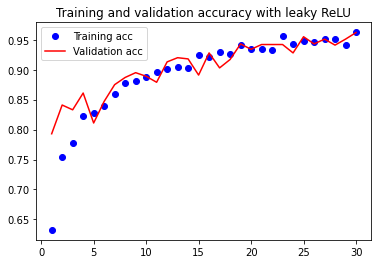

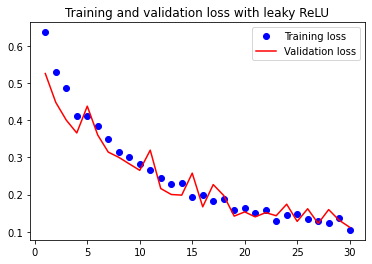

In [42]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with leaky ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with leaky ReLU')
plt.legend()

plt.show()

In [45]:
model = load_model('tomnod_leaky_30epochs.h5')
model.summary()
img_path = 'damage/-96.960704_28.783292.jpeg'
import keras.utils as image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

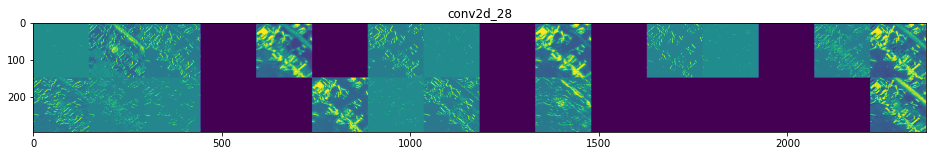

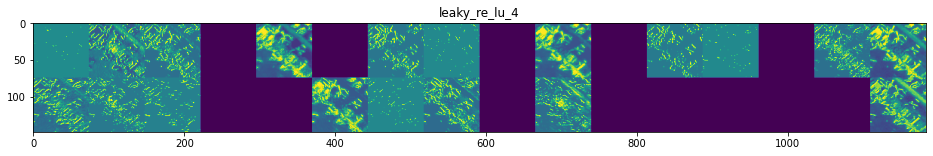

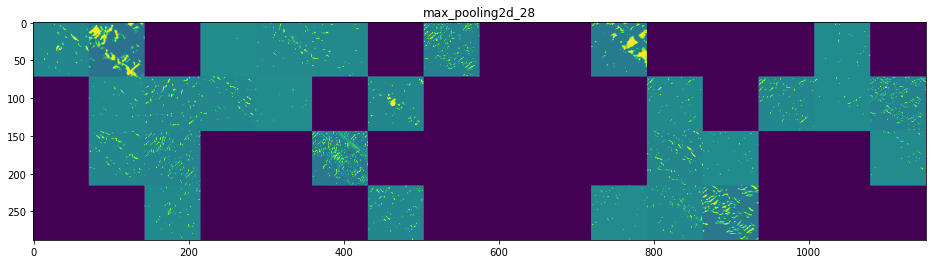

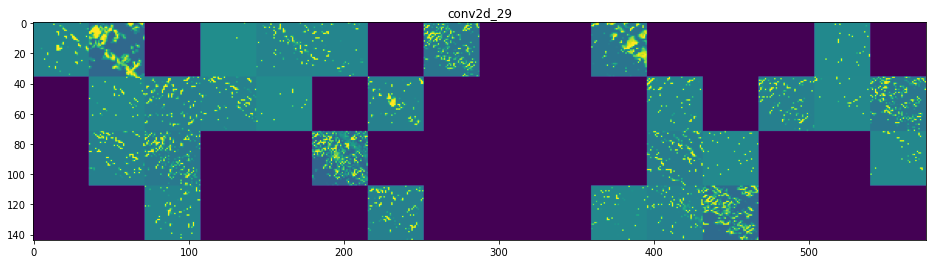

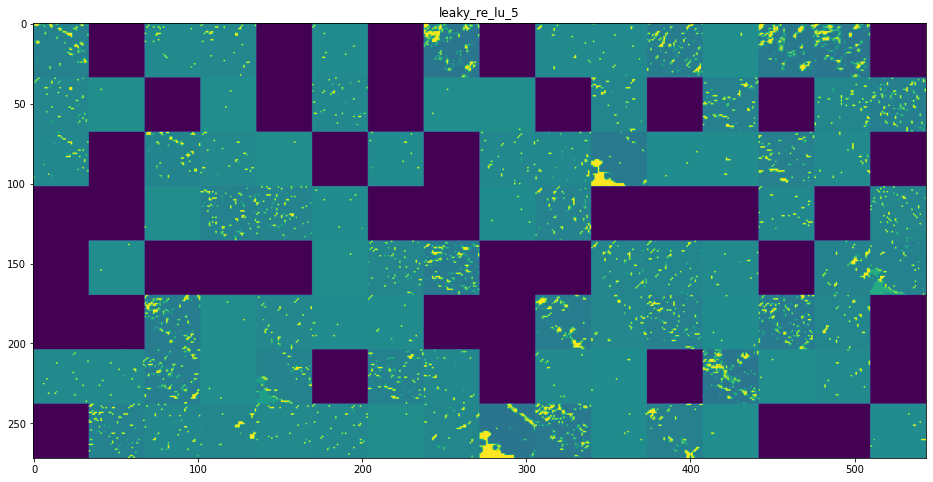

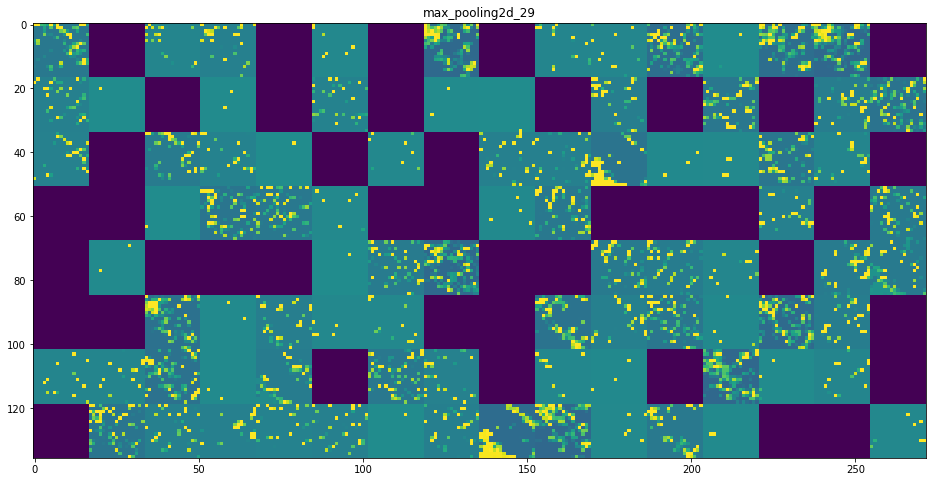

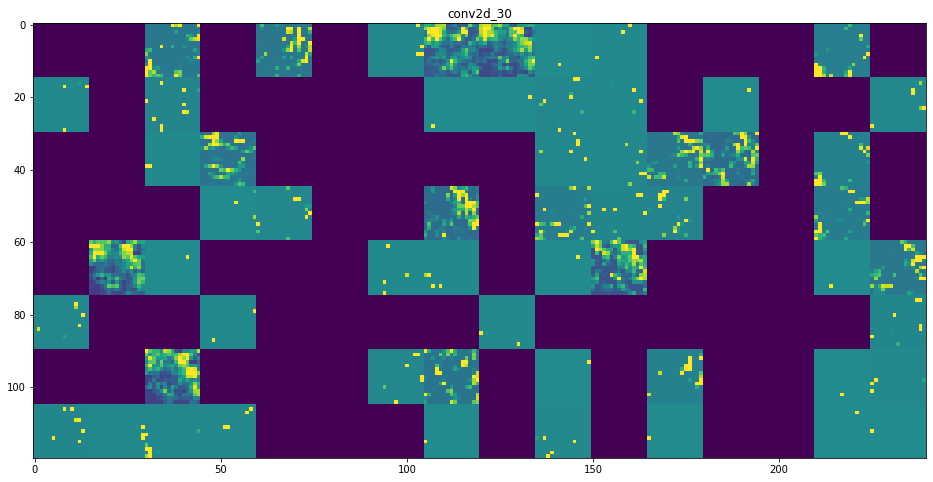

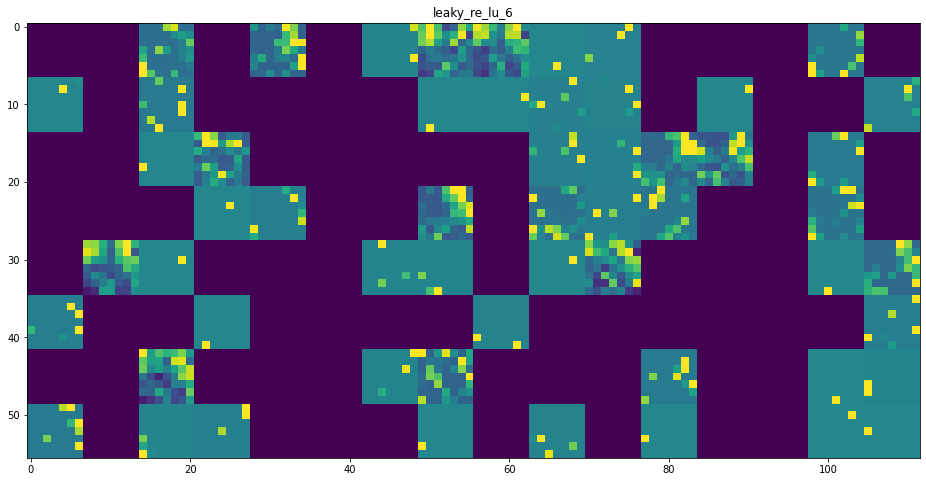

In [46]:
layer_names =[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [47]:
plt.savefig('informationFlow-leaky.png')

<Figure size 432x288 with 0 Axes>

In [48]:
#try transfer learning
#using feature extraction from ImageNet VGG16
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                    include_top = False, #no dense layers
                    input_shape = (150,150,3))
conv_base.summary()

58889256/58889256 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [53]:
#we still need a final, grand model

In [3]:
#temp
#let's build a model with leaky ReLU
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,kernel_regularizer= l2(1e-6)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)



C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\admin\AppData\Local\Temp\ipykernel_54340\1430544237.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 70s 690ms/step - loss: 0.6965 - acc: 0.5197 - val_loss: 0.6925 - val_acc: 0.4906
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 0.6826 - acc: 0.5487 - val_loss: 0.6878 - val_acc: 0.5113
Epoch 3/100
100/100 [==============================] - 86s 851ms/step - loss: 0.6372 - acc: 0.6344 - val_loss: 0.7171 - val_acc: 0.5163
Epoch 4/100
100/100 [==============================] - 67s 671ms/step - loss: 0.6078 - acc: 0.6809 - val_loss: 0.7859 - val_acc: 0.5056
Epoch 5/100
100/100 [==============================] - 63s 633ms/step - loss: 0.5787 - acc: 0.7097 - val_loss: 0.8531 - val_acc: 0.5131
Epoch 6/100
100/100 [==============================] - 72s 721ms/step - loss: 0.5654 - acc: 0.7321 - val_loss: 0.9459 - val_acc: 0.4994
Epoch 7/100
100/100 [==============================] - 71s 712ms/step - loss: 0.5453 - acc: 0.7431 - val_loss: 0.8892 - val_acc: 0.5306
Epoch 8/100
100/100 [=============================

In [4]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('tomnod_everything.h5')

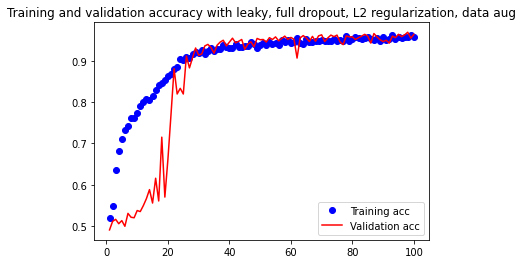

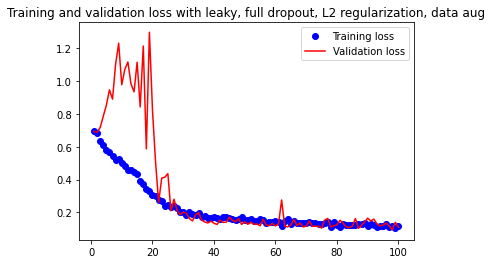

In [5]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()

In [59]:
#write the code to compute test set accuracy
#process the jpeg image
#create an image generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 9000 images belonging to 2 classes.


In [60]:
# uncomment to get the respective model 
model = load_model('tomnod_1.h5')
# model = load_model('tomnod_1_50epochs.h5')
# model = load_model('tomnod_2_100epochs.h5')
# model = load_model('tomnod_leaky_30epochs.h5')
# model = load_model('tomnod_transfer_dataAugment.h5')
# model = load_model('tomnod_everything.h5')
# model = load_model('tomnod_everything_relu.h5')
# model = load_model('tomnod_everything_relu_Adam.h5')
# model = load_model('tomnod_2_100epochs_Adam.h5')

test_results = model.evaluate_generator(test_generator)
test_results

C:\Users\admin\AppData\Local\Temp\ipykernel_24704\2449930409.py:12: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_results = model.evaluate_generator(test_generator)


[0.07346595823764801, 0.9735555648803711]

In [4]:
model = load_model('tomnod_2_100epochs.h5')

In [6]:
from sklearn.metrics import roc_curve
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(450):
    x,y = test_generator.next()
    temp_y = model.predict(x)
    y.tolist()
    temp_y.tolist()
    y_pred.extend(temp_y)
    y_label.extend(y)

Found 9000 images belonging to 2 classes.
1/1 [==============================] - 0s 73ms/step


In [7]:
len(y_pred)

9000

In [8]:
len(y_label)

9000

In [9]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_label, y_pred,pos_label=1)

In [10]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [11]:
print(auc_keras)

0.9825230625000001


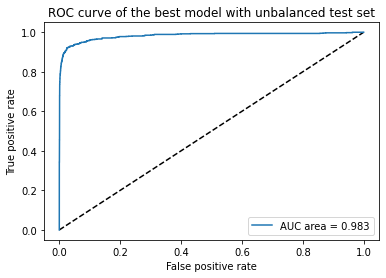

In [12]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC area = {:.3f}'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the best model with unbalanced test set')
plt.legend(loc='best')
plt.show()

Found 9000 images belonging to 2 classes.
1/1 [==============================] - 0s 70ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_70024\4053554472.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


1/1 [==============================] - 0s 68ms/step


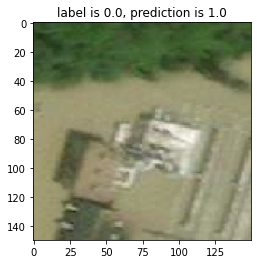

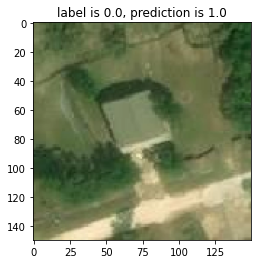

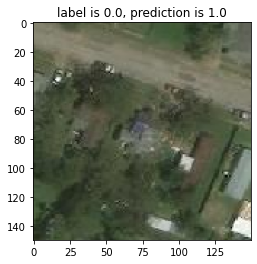

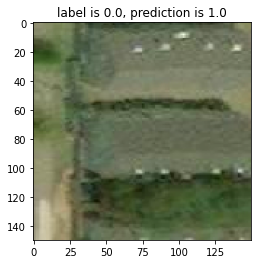

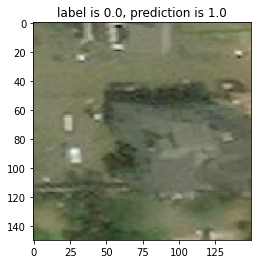

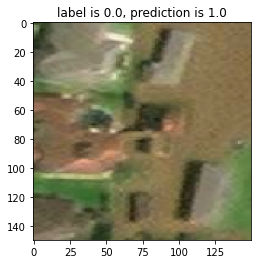

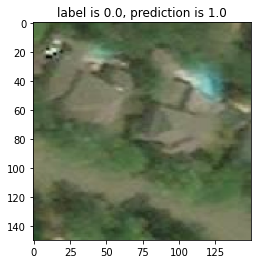

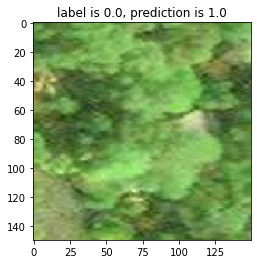

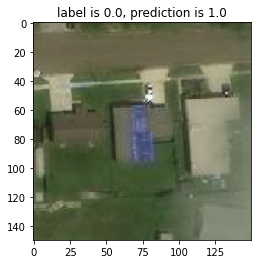

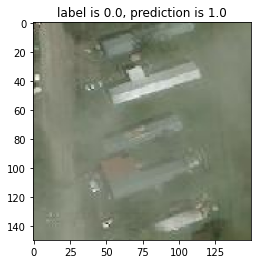

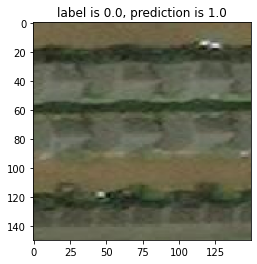

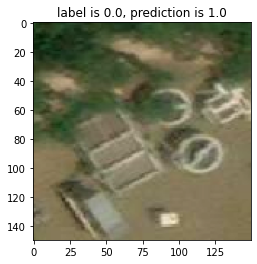

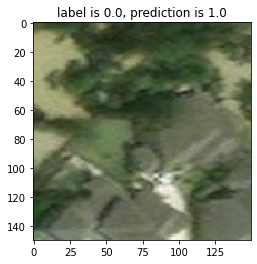

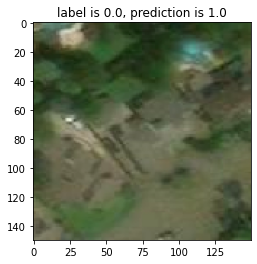

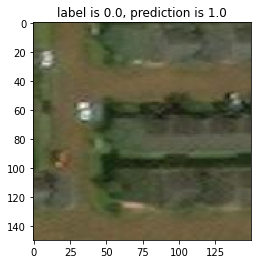

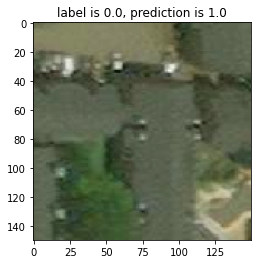

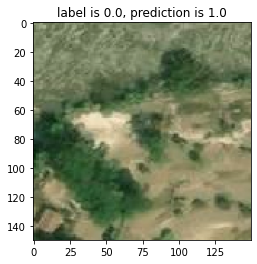

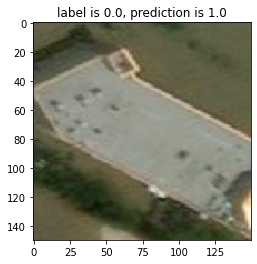

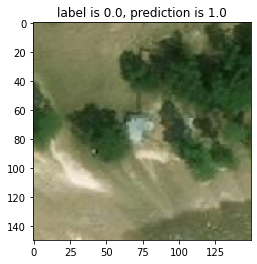

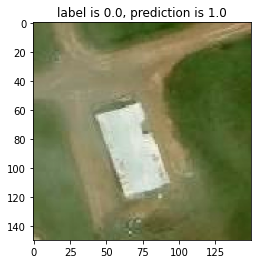

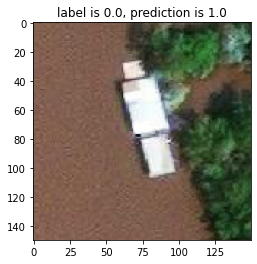

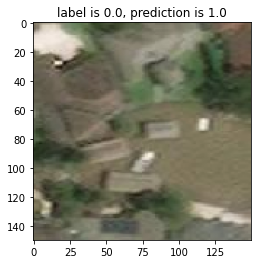

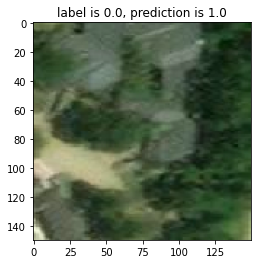

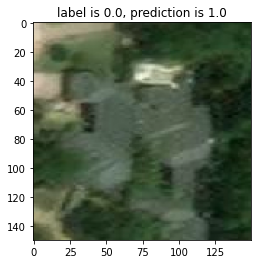

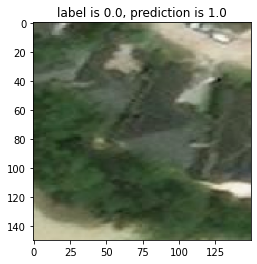

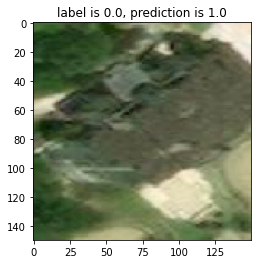

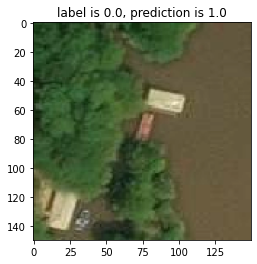

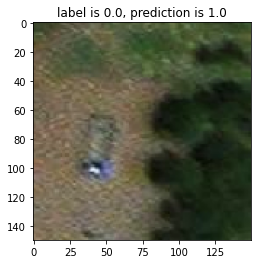

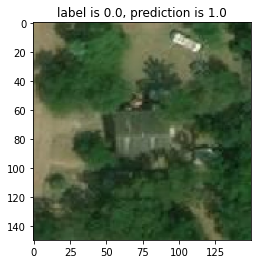

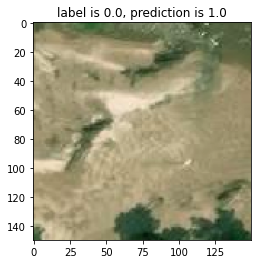

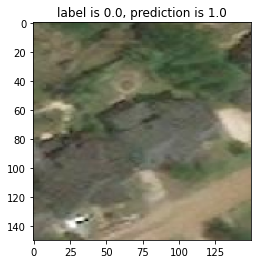

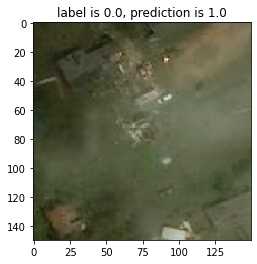

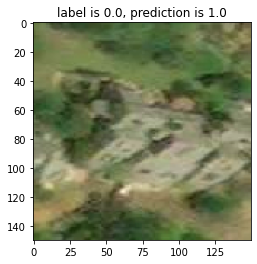

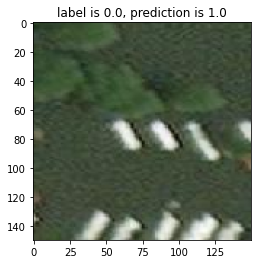

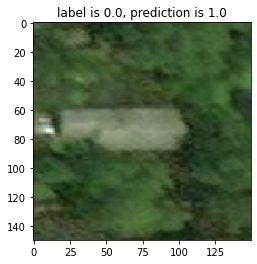

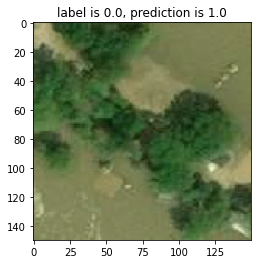

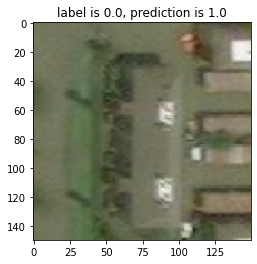

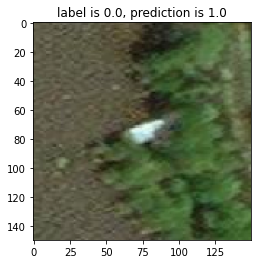

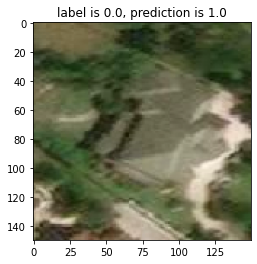

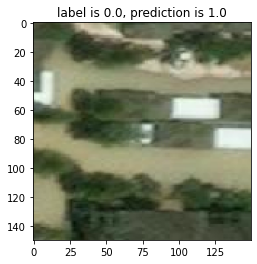

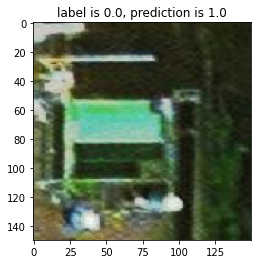

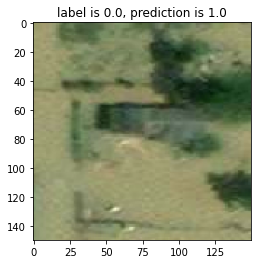

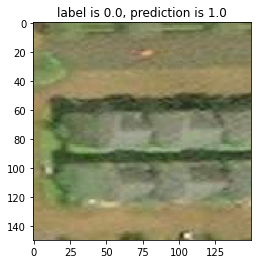

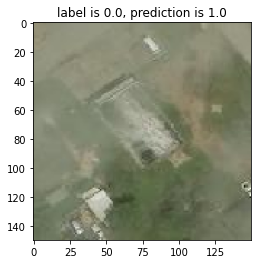

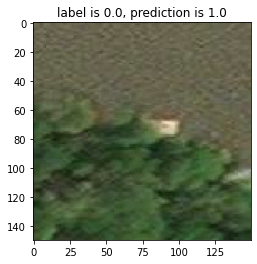

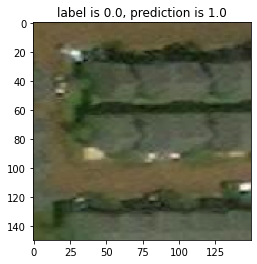

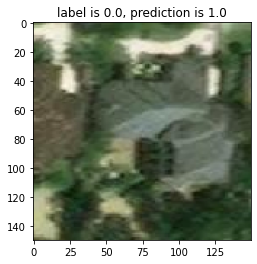

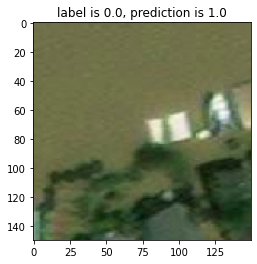

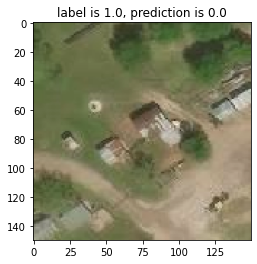

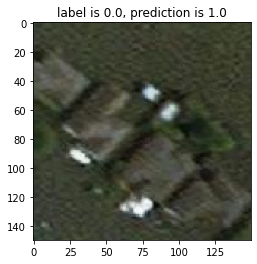

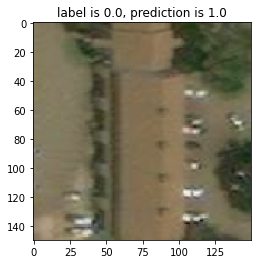

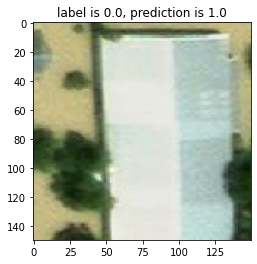

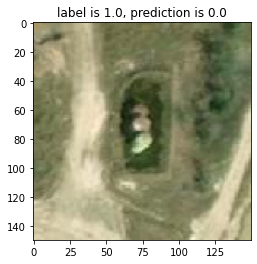

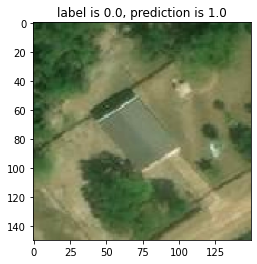

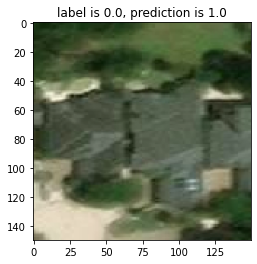

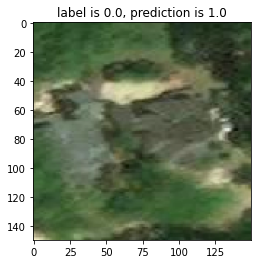

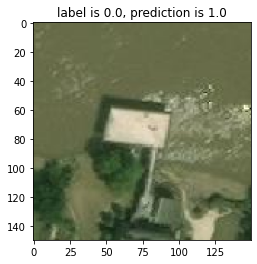

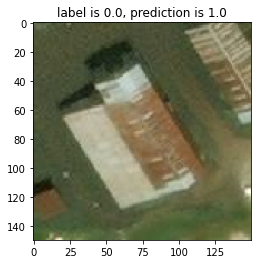

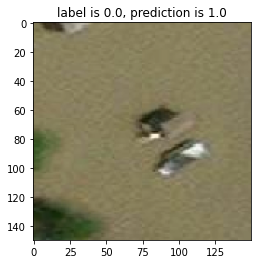

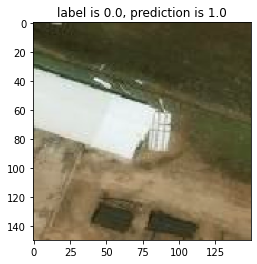

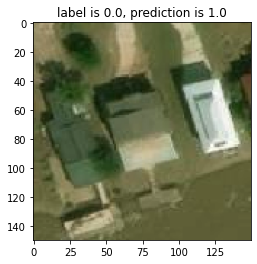

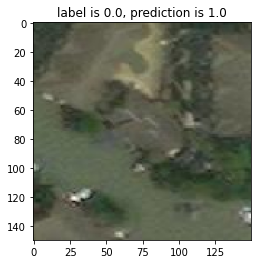

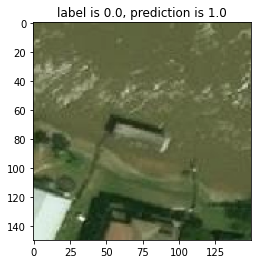

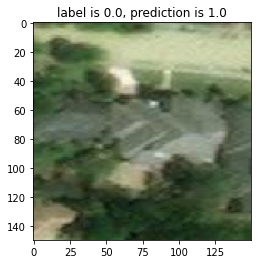

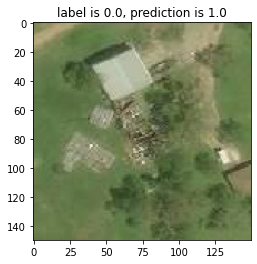

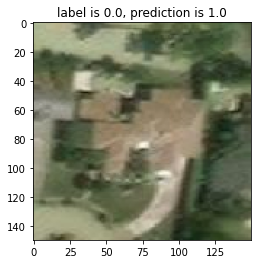

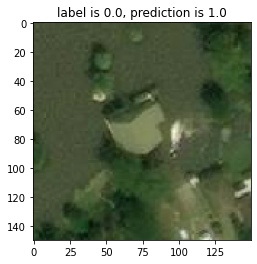

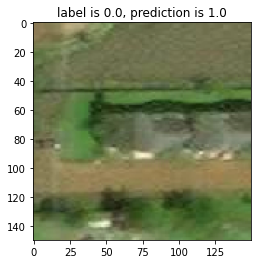

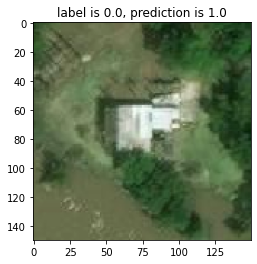

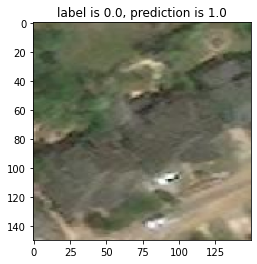

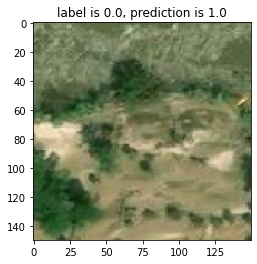

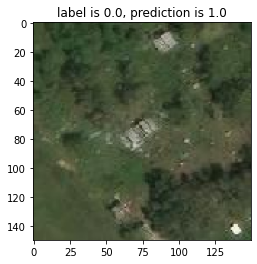

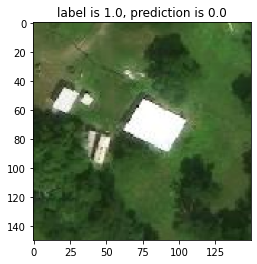

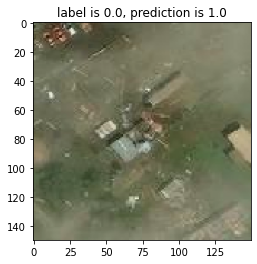

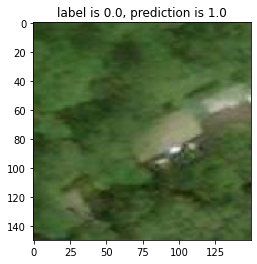

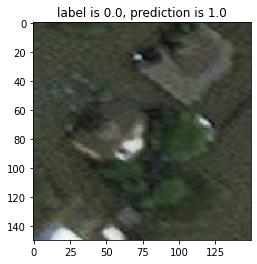

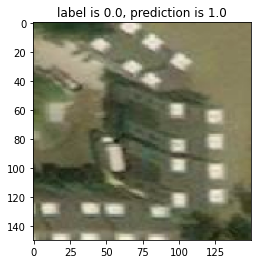

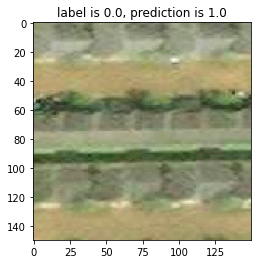

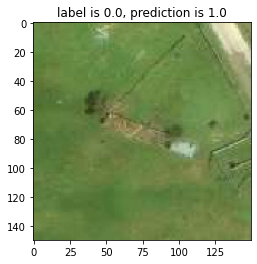

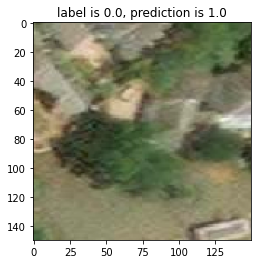

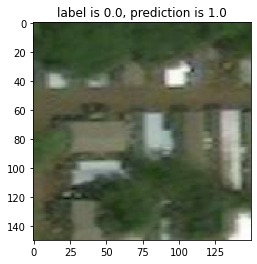

In [15]:
#see which image is misclassified
import tensorflow as tf 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(50):
    x,y = test_generator.next()
    y = y.ravel()
    temp_y = model.predict(x)
    temp_y = np.round(temp_y.ravel())
    misclassification = np.absolute(y-temp_y)

    #show the misclassification
    misclass_index = np.where(misclassification > 0.5)
    for j in range(len(misclass_index[0])):
        plt.figure()
        #print(misclass_index[0][j])
        plt.title('label is {}, prediction is {}'.format(y[misclass_index[0][j]],temp_y[misclass_index[0][j]]))
        plt.imshow(tf.keras.utils.array_to_img(x[misclass_index[0][j]]))
    misclass_index = None

In [16]:
#to see how the generator encodes the images into binary or multiclass:
test_generator.class_indices

{'damage': 0, 'no_damage': 1}

In [17]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
#another grand model with just relu
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
# model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu',kernel_regularizer = l2(1e-4)))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)



C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\admin\AppData\Local\Temp\ipykernel_70024\2692385448.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/10 [==============================] - 7s 631ms/step - loss: 0.8260 - acc: 0.4969 - val_loss: 0.7856 - val_acc: 0.4688
Epoch 2/10
10/10 [==============================] - 6s 585ms/step - loss: 0.7903 - acc: 0.4844 - val_loss: 0.7836 - val_acc: 0.5281
Epoch 3/10
10/10 [==============================] - 6s 620ms/step - loss: 0.7927 - acc: 0.5250 - val_loss: 0.7836 - val_acc: 0.5375
Epoch 4/10
10/10 [==============================] - 7s 676ms/step - loss: 0.7851 - acc: 0.5406 - val_loss: 0.7832 - val_acc: 0.5031
Epoch 5/10
10/10 [==============================] - 6s 588ms/step - loss: 0.7895 - acc: 0.5000 - val_loss: 0.7807 - val_acc: 0.5594
Epoch 6/10
10/10 [==============================] - 6s 591ms/step - loss: 0.7851 - acc: 0.4812 - val_loss: 0.7830 - val_acc: 0.4594
Epoch 7/10
10/10 [==============================] - 6s 616ms/step - loss: 0.7803 - acc: 0.5250 - val_loss: 0.7781 - val_acc: 0.6250
Epoch 8/10
10/10 [==============================] - 6s 618ms/step - loss: 0.

In [33]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('tomnod_everything_relu_Adam.h5')

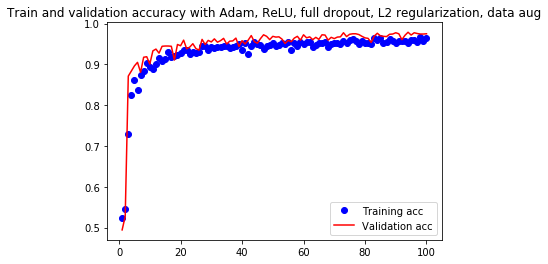

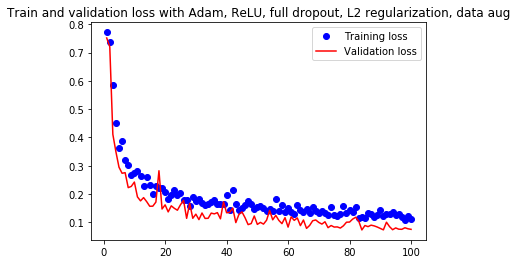

In [29]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Train and validation accuracy with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Train and validation loss with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()